### Visualizing the distribution of the observations

### Load the required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import urllib
import math
%pylab inline

import findspark
findspark.init()

from pyspark import SparkContext
#sc.stop()
sc = SparkContext(master="local[3]",pyFiles=['lib/numpy_pack.py','lib/spark_PCA.py','lib/computeStats.py'])

from pyspark import SparkContext
from pyspark.sql import *
sqlContext = SQLContext(sc)

import sys
sys.path.append('./lib')

import numpy as np
from numpy_pack import packArray,unpackArray
from spark_PCA import computeCov
from computeStats import computeOverAllDist, STAT_Descriptions

### Read the data frame from pickle file

data_dir='../../Data/Weather'
file_index='SBSSBSBB'

from pickle import load

#read statistics
filename=data_dir+'/STAT_%s.pickle'%file_index
STAT,STAT_Descriptions = load(open(filename,'rb'))
print 'keys from STAT=',STAT.keys()

#read data
filename=data_dir+'/US_Weather_%s.parquet'%file_index

df=sqlContext.read.parquet(filename)
print df.count()
df.show(5)

Populating the interactive namespace from numpy and matplotlib
keys from STAT= ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']
12619
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|elevation|latitude|longitude|measurement|    station|undefs|              vector|  year|   label|
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|   1451.5| 42.0358|-111.9617|       TMAX|USC00109698|    42|[40 4C 80 4D 80 5...|1899.0|SBSSBSBB|
|   1451.5| 42.0358|-111.9617|       TMAX|USC00109698|    17|[80 D1 80 C9 E0 5...|1900.0|SBSSBSBB|
|   1451.5| 42.0358|-111.9617|       TMAX|USC00109698|    16|[A0 D3 00 00 00 5...|1901.0|SBSSBSBB|
|   1451.5| 42.0358|-111.9617|       TMAX|USC00109698|    37|[80 54 E0 50 00 4...|1902.0|SBSSBSBB|
|   1451.5| 42.0358|-111.9617|       TMAX|USC00109698|    21|[00 C6 00 46 00 4...|1903.0|SBSSBSBB|
+---------+--------+---------+-----------+-----------+------+-------------

### Select data for a particular station and measurement type

In [2]:
sqlContext.registerDataFrameAsTable(df,'weather')
Query="SELECT * FROM weather\n\tWHERE measurement='%s' and station='%s'"%('TMAX','USC00109698')
print Query
df1 = sqlContext.sql(Query)
print df1.count(),'rows'
df1.show(2)
rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
T=np.vstack(rows)
T=T/10.  # scaling to make the temperature be in centingrates
shape(T)

SELECT * FROM weather
	WHERE measurement='TMAX' and station='USC00109698'
18 rows
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|elevation|latitude|longitude|measurement|    station|undefs|              vector|  year|   label|
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|   1451.5| 42.0358|-111.9617|       TMAX|USC00109698|    42|[40 4C 80 4D 80 5...|1899.0|SBSSBSBB|
|   1451.5| 42.0358|-111.9617|       TMAX|USC00109698|    17|[80 D1 80 C9 E0 5...|1900.0|SBSSBSBB|
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
only showing top 2 rows



(18, 365)

In [3]:
Query1="SELECT * FROM weather\n\tWHERE measurement='%s'"%('TMAX')
print Query1
df_test = sqlContext.sql(Query1)
print df_test.count(),'rows'
df_test.show()
rows_test=df_test.rdd.map(lambda row:(row.elevation,row.station,unpackArray(row['vector'],np.float16))).collect()
#rows_test1=rows_test.map(lambda (v,y):(v,np.hstack(y))).collect()
 #xs: [x[0] for x in xs]

                         #T=np.vstack(rows_test
#T=T/10.  # scaling to make the temperature be in centingrates
#shape(T)


import pandas as pd



df_test=pd.DataFrame(rows_test)
    


df_test1=df_test[2].apply(pd.Series)/10

# rename 0 to elvation 

del df_test[2]

df_test3=pd.concat([df_test,df_test2],axis=1)

df_test3

SELECT * FROM weather
	WHERE measurement='TMAX'
2571 rows
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|elevation|latitude|longitude|measurement|    station|undefs|              vector|  year|   label|
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|   1451.5| 42.0358|-111.9617|       TMAX|USC00109698|    42|[40 4C 80 4D 80 5...|1899.0|SBSSBSBB|
|   1451.5| 42.0358|-111.9617|       TMAX|USC00109698|    17|[80 D1 80 C9 E0 5...|1900.0|SBSSBSBB|
|   1451.5| 42.0358|-111.9617|       TMAX|USC00109698|    16|[A0 D3 00 00 00 5...|1901.0|SBSSBSBB|
|   1451.5| 42.0358|-111.9617|       TMAX|USC00109698|    37|[80 54 E0 50 00 4...|1902.0|SBSSBSBB|
|   1451.5| 42.0358|-111.9617|       TMAX|USC00109698|    21|[00 C6 00 46 00 4...|1903.0|SBSSBSBB|
|   1451.5| 42.0358|-111.9617|       TMAX|USC00109698|    45|[00 C6 00 46 80 C...|1904.0|SBSSBSBB|
|   1451.5| 42.0358|-111.9617|       TMAX|USC001096

NameError: name 'df_test2' is not defined

In [ ]:
rows_test1[1]

In [ ]:
test1

In [ ]:
test1

### Script for plotting yearly plots

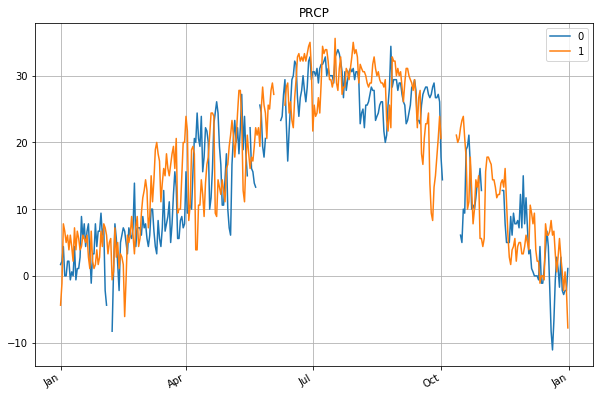

In [5]:
from YearPlotter import YearPlotter
fig, ax = plt.subplots(figsize=(10,7));
YP=YearPlotter()
YP.plot(T[:2,:].transpose(),fig,ax,title='PRCP')
#title('A sample of graphs');

### Distribution of missing observations
The distribution of missing observations is not uniform throughout the year. We visualize it below.

In [6]:
def plot_pair(pair,func):
    j=0
    fig,X=subplots(1,2,figsize=(16,6))
    axes=X.reshape(2)
    for m in pair:
        axis = axes[j]
        j+=1
        func(m,fig,axis)
        
def plot_valid(m,fig,axis):
    valid_m=STAT[m]['NE']
    YP.plot(valid_m,fig,axis,title='valid-counts '+m)
    

/Users/egouda/anaconda2/envs/py27/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


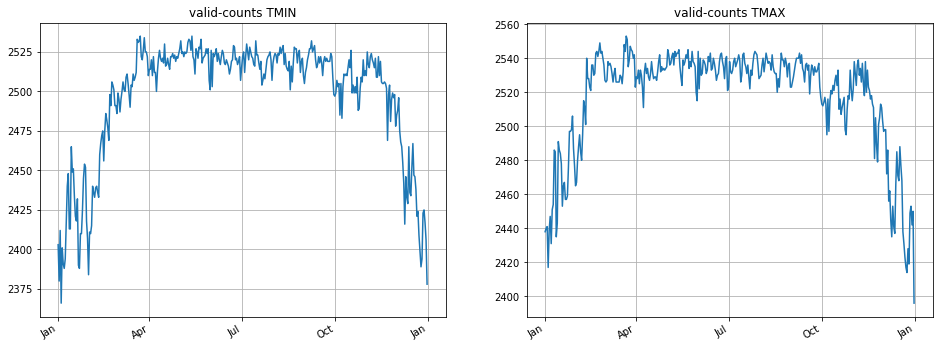

In [7]:
plot_pair(['TMIN','TMAX'],plot_valid)

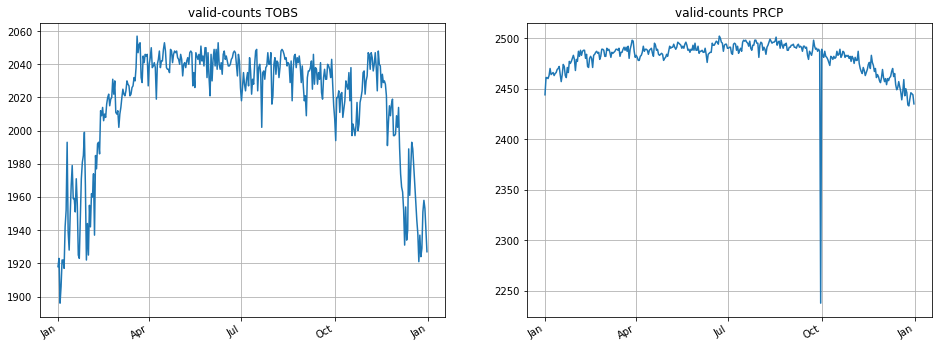

In [8]:
plot_pair(['TOBS','PRCP'],plot_valid)

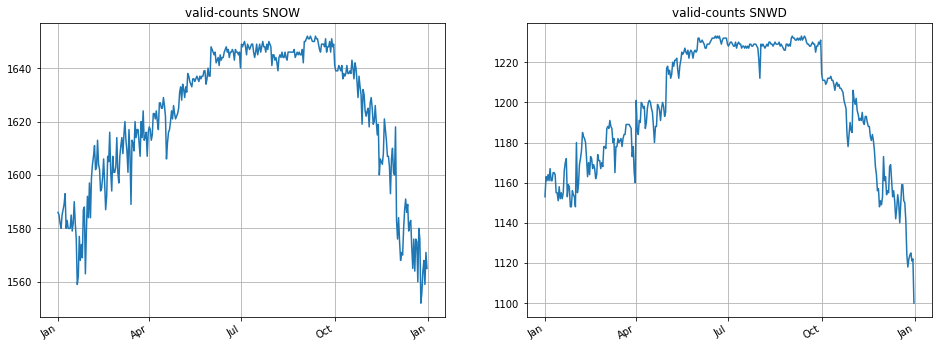

In [9]:
plot_pair(['SNOW', 'SNWD'],plot_valid)

### Plots of mean and std of observations

In [10]:
 STAT['TMIN']['Cov']

array([[ 3815.00448132,  2186.87904021,  1365.37318824, ...,
          584.82493224,   542.82083316,   359.39078271],
       [ 2186.87904021,  4101.51638638,  2271.97844578, ...,
          450.57580646,   331.25186459,    24.81084311],
       [ 1365.37318824,  2271.97844578,  4275.94649661, ...,
          657.40755667,   400.57561049,   217.65540609],
       ..., 
       [  584.82493224,   450.57580646,   657.40755667, ...,
         3931.78924694,  2354.78200629,  1601.86364779],
       [  542.82083316,   331.25186459,   400.57561049, ...,
         2354.78200629,  3612.52057443,  2208.44456491],
       [  359.39078271,    24.81084311,   217.65540609, ...,
         1601.86364779,  2208.44456491,  4113.5111447 ]])

In [11]:
  STAT['TMIN']['Mean']=STAT['TMIN']['Mean']

In [12]:
  STAT['TMAX']['Mean']=STAT['TMAX']['Mean']

In [13]:
STAT['PRCP']['Mean']=STAT['PRCP']['Mean']


In [14]:
def plot_mean_std(m,fig,axis):
    mean=STAT[m]['Mean']
    std=(np.sqrt(STAT[m]['Var']))/10
    graphs=np.vstack([mean-std,mean,mean+std]).transpose()
    YP.plot(graphs,fig,axis,title='Mean+-std'+m)
    

In [15]:
def plot_mean_std(m,fig,axis):
    mean=STAT[m]['Mean']
    std=(np.sqrt(STAT[m]['Var']))/10
    graphs=np.vstack([mean]).transpose()
    YP.plot(graphs,fig,axis,title='Mean'+m)
    

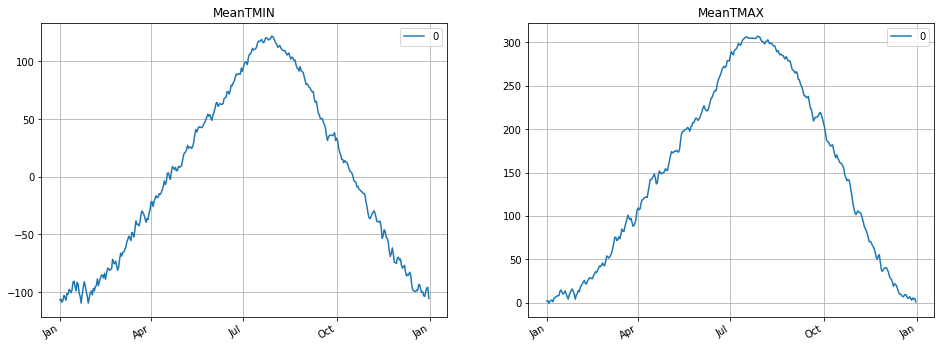

In [16]:
plot_pair(['TMIN','TMAX'],plot_mean_std)


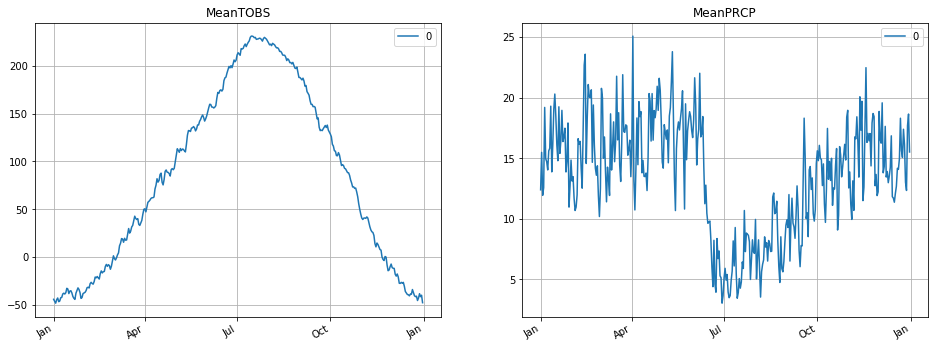

In [17]:
plot_pair(['TOBS','PRCP'],plot_mean_std)

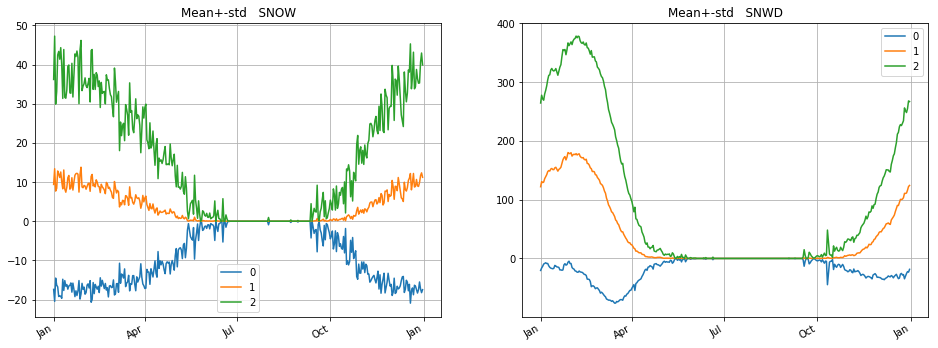

In [16]:
plot_pair(['SNOW', 'SNWD'],plot_mean_std)

### plotting top 3 eigenvectors

In [13]:
def plot_eigen(m,fig,axis):
    EV=STAT[m]['eigvec']
    YP.plot(EV[:,:3],fig,axis,title='Top Eigenvectors '+m)

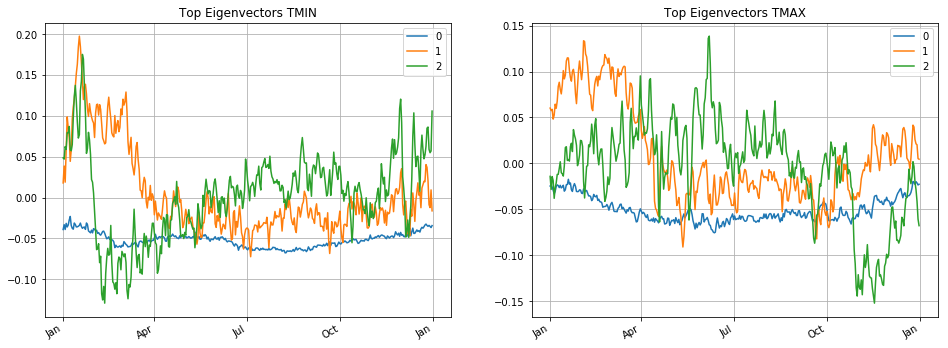

In [14]:
plot_pair(['TMIN','TMAX'],plot_eigen)

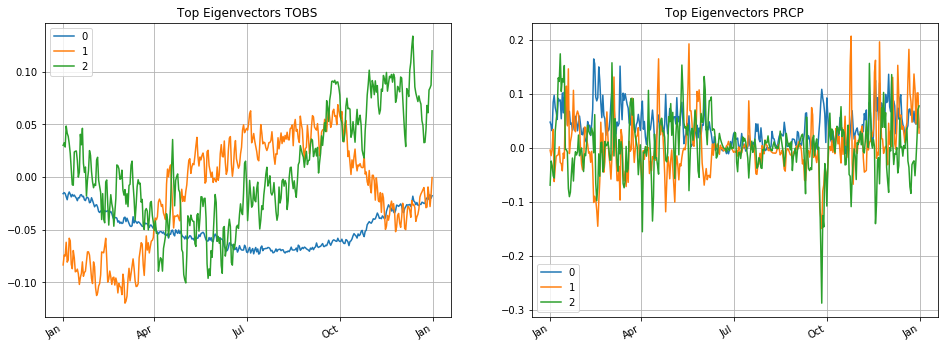

In [15]:
plot_pair(['TOBS','PRCP'],plot_eigen)

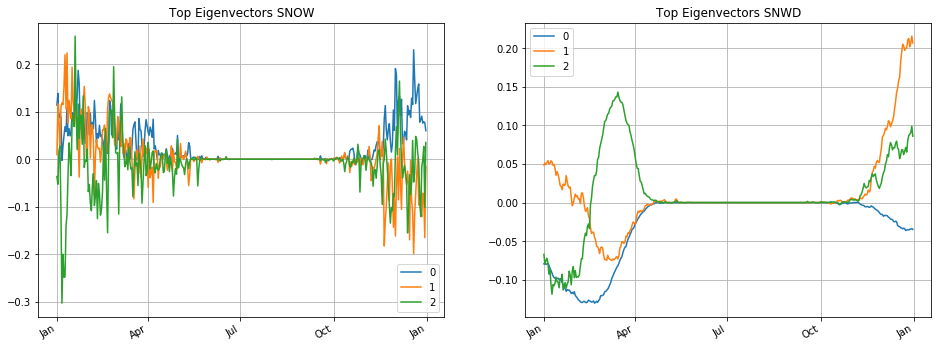

In [16]:
plot_pair(['SNOW', 'SNWD'],plot_eigen)

### Script for plotting percentage of variance explained

In [17]:
def pltVarExplained(j):
    subplot(1,3,j)
    EV=STAT[m]['eigval']
    k=5
    plot(([0,]+list(cumsum(EV[:k])))/sum(EV))
    title('Percentage of Variance Explained for '+ m)
    ylabel('Percentage of Variance')
    xlabel('# Eigenvector')
    grid()
    

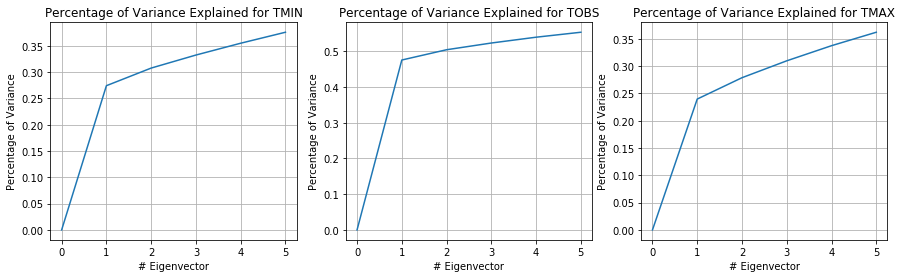

In [18]:
f=plt.figure(figsize=(15,4))
j=1
for m in ['TMIN', 'TOBS', 'TMAX']: #,
    pltVarExplained(j)
    j+=1

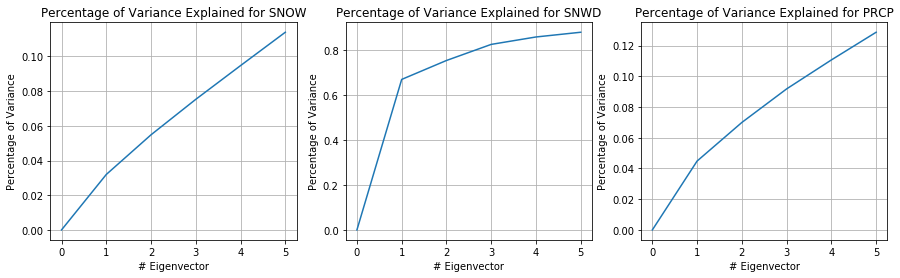

In [19]:
f=plt.figure(figsize=(15,4))
j=1
for m in ['SNOW', 'SNWD', 'PRCP']:
    pltVarExplained(j)
    j+=1 

In [21]:
#sc.stop()